In [44]:
# Импорт библиотек
import pandas as pd
import requests
from matplotlib import pyplot as plt
from tqdm import tqdm 

In [3]:
constant_url = 'https://stepik.org:443/api/courses'

In [199]:
# Фильтры можно будет перестроить
N_PAGES = 1000
constant_url = 'https://stepik.org:443/api/courses'
courses = []
for i in tqdm(range(1, N_PAGES + 1)):
    req = requests.get(constant_url, params={'page': i}).json()['courses']
    # если словарь, то докидываем курс в список
    if req.__class__ == {}.__class__:
    	# проверяем на условия
    	if req['learners_count'] >= 70 and req['lessons_count'] >= 10 \
    	and req['quizzes_count'] >= 5:
    		courses.append(r)
    	else:
    		pass
    # если список, то разворачиваем список
    elif req.__class__ == [].__class__:
    	#проверяем условия для каждого курса
    	for j in req:
    		if j['learners_count'] >= 70 and j['lessons_count'] >= 10 \
    		and j['quizzes_count'] >= 5:
    			courses.append(j)
    		else:
    			pass
        data = pd.DataFrame(courses)


100%|██████████| 100/100 [02:29<00:00,  1.49s/it]


In [197]:
pd.DataFrame(courses)[['id', 'total_units', 'learners_count', 'lessons_count', 'quizzes_count']]

,id,total_units,learners_count,lessons_count,quizzes_count
0,68091,41,73,41,37
1,66819,10,71,10,15
2,66792,17,84,17,100
3,66689,10,78,10,10


In [186]:
data[['id', 'total_units', 'learners_count', 'lessons_count', 'quizzes_count']].head() 

,id,total_units,learners_count,lessons_count,quizzes_count
0,69108,1,0,0,0
1,69095,2,0,0,0
2,69091,2,0,0,0
3,69085,2,0,0,0
4,69083,3,0,0,0


In [200]:
filtered_data = data#[data['total_units'] > 50]
filtered_data = filtered_data[filtered_data['learners_count'] >= 70]
filtered_data = filtered_data[filtered_data['lessons_count'] >= 10]
filtered_data = filtered_data[filtered_data['quizzes_count'] >= 5]

#filtered_data = filtered_data[filtered_data['total_units'] < 3000]
#filtered_data = filtered_data[filtered_data['learners_count'] < 10000]

In [201]:
filtered_data.shape

(4, 111)

In [198]:
filtered_data[['id', 'total_units', 'learners_count', 'lessons_count', 'quizzes_count']]

,id,total_units,learners_count,lessons_count,quizzes_count
122,68091,41,73,41,37
336,66792,17,84,17,100
353,66689,10,78,10,10


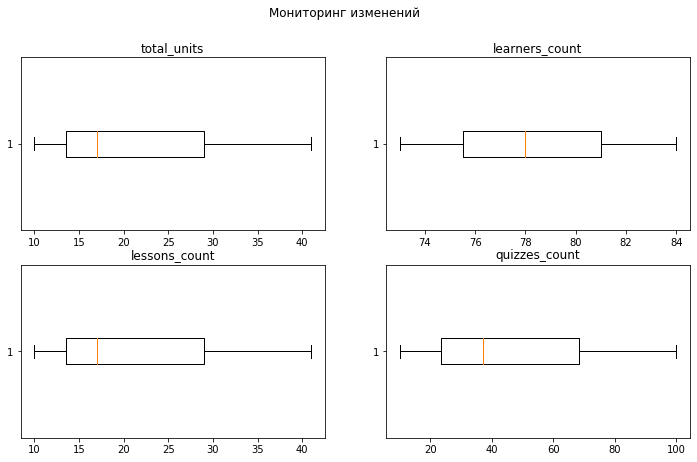

(3, 111)


In [193]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle('Мониторинг изменений')
ax1.boxplot(filtered_data['total_units'], vert=False)
ax1.set_title('total_units')
ax2.boxplot(filtered_data['learners_count'], vert=False)
ax2.set_title('learners_count')
ax3.boxplot(filtered_data['lessons_count'], vert=False)
ax3.set_title('lessons_count')
ax4.boxplot(filtered_data['quizzes_count'], vert=False)
ax4.set_title('quizzes_count')

plt.show()
print(filtered_data.shape)